## Data Gathering

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

import nltk
from nltk.cluster.kmeans import KMeansClusterer

In [2]:
??KMeans

In [3]:
pwd()

'C:\\Users\\Administrator\\Python Notebooks\\Coders Art'

In [2]:
trueLabels = pd.read_csv('C:\\Users\\Administrator\\Python Notebooks\\Coders Art\\Assesment\\Assesment\\Machine Learning\\Data\\bbcsport_classes.csv', header=None)
trueLabels

0
0    0
1    0
2    0
3    0
4    0
..  ..
732  4
733  4
734  4
735  4
736  4

[737 rows x 1 columns]

In [3]:
terms = pd.read_csv('C:\\Users\\Administrator\\Python Notebooks\\Coders Art\\Assesment\\Assesment\\Machine Learning\\Data\\bbcsport_terms.csv', header=None)
terms

0
0      claxton
1         hunt
2        first
3        major
4        medal
...        ...
4608       hip
4609   fiveset
4610     mario
4611     ancic
4612  lundgren

[4613 rows x 1 columns]

In [4]:
pd.set_option('display.max_columns', 4613)

X = pd.read_csv('C:\\Users\\Administrator\\Python Notebooks\\Coders Art\\Assesment\\Assesment\\Machine Learning\\Data\\bbcsport_mtx.csv', header = None)

In [7]:
X

0     1     2     3     4     5     6     7     8     9     10    11    \
0       7     1     3     2     4     2     1     1     2     2     1     3   
1       0     0     1     0     0     0     0     0     0     0     1     0   
2       0     0     0     0     1     0     0     0     0     2     0     0   
3       0     0     0     0     0     0     0     0     0     0     0     0   
4       0     0     0     0     0     0     0     0     0     2     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     0     4     0     0     1     0     0     0     0     0     0   
733     0     0     1     0     0     0     0     0     0     3     0     0   
734     0     0     2     0     0     0     0     0     0     1     1     0   
735     0     0     0     0     0     1     0     0     1     0     0     0   
736     0     0     4     0     0     0     0     0     0     2     0     0   

     12    13    14    15    16    17    18    19    20    21    22    23    \
0       2     1     1     2     1     1     2     3     1     2     1     1   
1       0     1     0     0     0     0     0     0     0     0     0     0   
2       1     1     0     0     0     1     1     0     0     1     2     1   
3       0     0     0     0     0     0     0     0     0     0     1     0   
4       2     0     0     0     0     3     0     0     0     0     2     1   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     1     0     0     0     0     0     0     0     0     1     0   
733     1     0     0     0     0     0     0     0     0     1     2     0   
734     1     0     0     0     0     0     0     0     0     1     1     0   
735     0     0     0     0     0     0     0     0     0     0     0     0   
736     0     0     0     0     0     0     0     0     0     0     6     0   

     24    25    26    27    28    29    30    31    32    33    34    35    \
0       1     1     1     2     1     2     1     1     2     1     2     1   
1       0     0     0     0     0     1     0     0     0     0     1     0   
2       0     3     0     4     0     0     6     3     0     0     1     1   
3       0     0     0     0     0     0     0     0     0     1     0     0   
4       0     2     0     0     0     0     1     0     1     0     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     4     0     0     0     0     0     0     1     0     0     0   
733     0     0     0     4     0     0     0     0     0     0     0     0   
734     0     0     0     1     0     1     0     0     0     0     0     0   
735     0     0     0     0     0     0     0     0     0     0     0     4   
736     0     4     0     1     0     0     0     0     0     0     0     0   

     36    37    38    39    40    41    42    43    44    45    46    47    \
0       1     1     1     1     2     1     1     1     1     1     1     1   
1       0     1     0     2     1     0     0     0     0     0     1     0   
2       0     0     0     0     0     0     0     0     0     0     0     0   
3       0     0     0     0     0     0     0     0     0     0     6     0   
4       0     0     0     0     1     0     0     0     0     1     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     0     0     0     0     0     0     0     0     0     0     0   
733     0     0     0     0     0     0     0     0     0     0     0     0   
734     0     0     0     0     0     0     0     0     0     0     0     0   
735     0     0     0     0     0     0     0     0     0     0     0     0   
736     0     0     0     0     1     0     0     0     0     0     0     0   

     48    49    50    51    52    53    54    55    56    57    58    59    \
0       1     2     1     1     1     1     1     1     1     1     1     1   
1       0     0     2     1     0     0     0     0

In [5]:
data = X
data

0     1     2     3     4     5     6     7     8     9     10    11    \
0       7     1     3     2     4     2     1     1     2     2     1     3   
1       0     0     1     0     0     0     0     0     0     0     1     0   
2       0     0     0     0     1     0     0     0     0     2     0     0   
3       0     0     0     0     0     0     0     0     0     0     0     0   
4       0     0     0     0     0     0     0     0     0     2     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     0     4     0     0     1     0     0     0     0     0     0   
733     0     0     1     0     0     0     0     0     0     3     0     0   
734     0     0     2     0     0     0     0     0     0     1     1     0   
735     0     0     0     0     0     1     0     0     1     0     0     0   
736     0     0     4     0     0     0     0     0     0     2     0     0   

     12    13    14    15    16    17    18    19    20    21    22    23    \
0       2     1     1     2     1     1     2     3     1     2     1     1   
1       0     1     0     0     0     0     0     0     0     0     0     0   
2       1     1     0     0     0     1     1     0     0     1     2     1   
3       0     0     0     0     0     0     0     0     0     0     1     0   
4       2     0     0     0     0     3     0     0     0     0     2     1   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     1     0     0     0     0     0     0     0     0     1     0   
733     1     0     0     0     0     0     0     0     0     1     2     0   
734     1     0     0     0     0     0     0     0     0     1     1     0   
735     0     0     0     0     0     0     0     0     0     0     0     0   
736     0     0     0     0     0     0     0     0     0     0     6     0   

     24    25    26    27    28    29    30    31    32    33    34    35    \
0       1     1     1     2     1     2     1     1     2     1     2     1   
1       0     0     0     0     0     1     0     0     0     0     1     0   
2       0     3     0     4     0     0     6     3     0     0     1     1   
3       0     0     0     0     0     0     0     0     0     1     0     0   
4       0     2     0     0     0     0     1     0     1     0     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     4     0     0     0     0     0     0     1     0     0     0   
733     0     0     0     4     0     0     0     0     0     0     0     0   
734     0     0     0     1     0     1     0     0     0     0     0     0   
735     0     0     0     0     0     0     0     0     0     0     0     4   
736     0     4     0     1     0     0     0     0     0     0     0     0   

     36    37    38    39    40    41    42    43    44    45    46    47    \
0       1     1     1     1     2     1     1     1     1     1     1     1   
1       0     1     0     2     1     0     0     0     0     0     1     0   
2       0     0     0     0     0     0     0     0     0     0     0     0   
3       0     0     0     0     0     0     0     0     0     0     6     0   
4       0     0     0     0     1     0     0     0     0     1     0     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
732     0     0     0     0     0     0     0     0     0     0     0     0   
733     0     0     0     0     0     0     0     0     0     0     0     0   
734     0     0     0     0     0     0     0     0     0     0     0     0   
735     0     0     0     0     0     0     0     0     0     0     0     0   
736     0     0     0     0     1     0     0     0     0     0     0     0   

     48    49    50    51    52    53    54    55    56    57    58    59    \
0       1     2     1     1     1     1     1     1     1     1     1     1   
1       0     0     2     1     0     0     0     0

### Euclidean Distance as the Measure

In [2]:
import nltk

In [10]:
from nltk.cluster.kmeans import KMeansClusterer
NUM_CLUSTERS = 5


kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
assigned_clusters = kclusterer.cluster(data.values, assign_clusters=True)

In [11]:
assigned_clusters

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 4,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 4,
 2,
 2,
 2,
 0,
 4,
 2,
 4,
 2,
 2,
 0,
 0,
 4,
 2,
 2,
 4,
 4,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,


In [12]:
pred=assigned_clusters

In [13]:
len(pred)

737

In [14]:
from sklearn.metrics import adjusted_rand_score

In [15]:
len(list(trueLabels[0]))

737

In [16]:
adjusted_rand_score(pred, list(trueLabels[0]))

0.1058253349930276

In [17]:
from sklearn.metrics import adjusted_mutual_info_score

In [18]:
adjusted_mutual_info_score(pred, list(trueLabels[0]))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.18456311535929262

#### K- Means Cluster Performances over 50 Observations

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
for i in range(50):
    kclusterer = KMeansClusterer(NUM_CLUSTERS, avoid_empty_clusters=True, distance=nltk.cluster.util.euclidean_distance, repeats=25)
    assigned_clusters = kclusterer.cluster(data.values, assign_clusters=True)
    pred=assigned_clusters
    ri = adjusted_rand_score(pred, list(trueLabels[0]))
    mi = adjusted_mutual_info_score(pred, list(trueLabels[0]))
    print('{}. Adjusted Rand Index = {}, Adjusted Mutual Info = {}'. format(i, ri, mi))

0. Adjusted Rand Index = 0.11672493748373755, Adjusted Mutual Info = 0.20246544188166535
1. Adjusted Rand Index = 0.1851115975821033, Adjusted Mutual Info = 0.3958377862923577
2. Adjusted Rand Index = 0.06495308943749568, Adjusted Mutual Info = 0.2351515433629896
3. Adjusted Rand Index = 0.08313916268559064, Adjusted Mutual Info = 0.24923994344157696
4. Adjusted Rand Index = 0.11294445967962351, Adjusted Mutual Info = 0.27933700074680134
5. Adjusted Rand Index = 0.02334921934981424, Adjusted Mutual Info = 0.14189598931507033
6. Adjusted Rand Index = 0.26652577029988495, Adjusted Mutual Info = 0.33092076002227605
7. Adjusted Rand Index = 0.07162438635578702, Adjusted Mutual Info = 0.19733767001266514
8. Adjusted Rand Index = 0.09927049289430004, Adjusted Mutual Info = 0.17892966950028363
9. Adjusted Rand Index = -0.008563417771049782, Adjusted Mutual Info = 0.14235578798576523
10. Adjusted Rand Index = -0.0018444294481131938, Adjusted Mutual Info = 0.11019835660450829
11. Adjusted Rand 

### Cosine Distance as the Measure

In [22]:
import nltk

In [8]:
from nltk.cluster.kmeans import KMeansClusterer
NUM_CLUSTERS = 5


kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(data.values, assign_clusters=True)

In [24]:
assigned_clusters

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,


In [25]:
pred=assigned_clusters

In [26]:
len(pred)

737

In [27]:
from sklearn.metrics import adjusted_rand_score

In [28]:
len(list(trueLabels[0]))

737

In [29]:
adjusted_rand_score(pred, list(trueLabels[0]))

0.6932000705592423

In [30]:
from sklearn.metrics import adjusted_mutual_info_score

In [31]:
adjusted_mutual_info_score(pred, list(trueLabels[0]))

0.7039321192788706

#### K- Means Cluster Performances over 50 Observations

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
for i in range(50):
    kclusterer = KMeansClusterer(NUM_CLUSTERS, avoid_empty_clusters=True, distance=nltk.cluster.util.cosine_distance, repeats=25)
    assigned_clusters = kclusterer.cluster(data.values, assign_clusters=True)
    pred=assigned_clusters
    ri = adjusted_rand_score(pred, list(trueLabels[0]))
    mi = adjusted_mutual_info_score(pred, list(trueLabels[0]))
    print('{}. Adjusted Rand Index = {}, Adjusted Mutual Info = {}'. format(i, ri, mi))

0. Adjusted Rand Index = 0.7052447086681846, Adjusted Mutual Info = 0.7232981149726566
1. Adjusted Rand Index = 0.8544335365386136, Adjusted Mutual Info = 0.8496644715403843
2. Adjusted Rand Index = 0.707686694615916, Adjusted Mutual Info = 0.7488094397271107
3. Adjusted Rand Index = 0.8555500893468887, Adjusted Mutual Info = 0.8437965608631848
4. Adjusted Rand Index = 0.8676007833603203, Adjusted Mutual Info = 0.8609847108931057
5. Adjusted Rand Index = 0.6140871210254256, Adjusted Mutual Info = 0.7110221818327144
6. Adjusted Rand Index = 0.8707367020084759, Adjusted Mutual Info = 0.8669737161628774
7. Adjusted Rand Index = 0.6644833497864878, Adjusted Mutual Info = 0.6847063172720638
8. Adjusted Rand Index = 0.8407428915005668, Adjusted Mutual Info = 0.8337769934277112
9. Adjusted Rand Index = 0.5859127196716241, Adjusted Mutual Info = 0.662067052247247
10. Adjusted Rand Index = 0.6208881207519036, Adjusted Mutual Info = 0.6506914954199617
11. Adjusted Rand Index = 0.6008094188484083

## Word Cloud

In [11]:
from wordcloud import WordCloud

In [12]:
cloud = WordCloud(background_color = 'white').generate(' '.join(list(terms[0])))

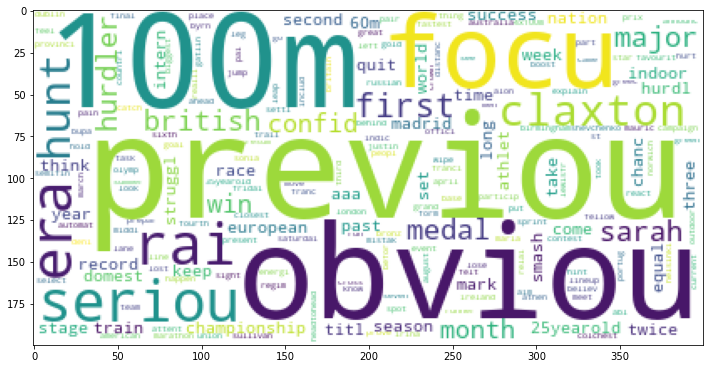

In [13]:
plt.figure(figsize = (12,9))
plt.imshow(cloud)
plt.show()